In [4]:
#import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates = ['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()


,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


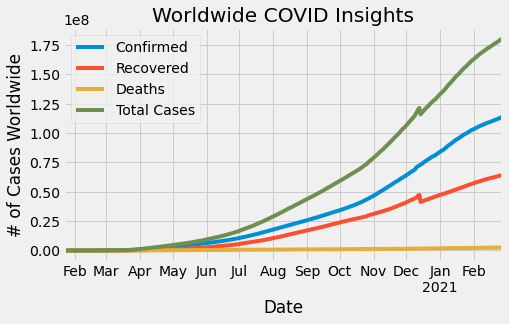

In [5]:
#Graphing worldwide cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize = (7, 4)) #7 inches wide, 4 inches high
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

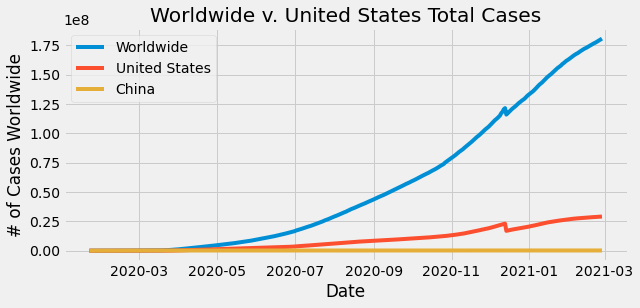

In [6]:
#Graphing worldwide cases, US cases, China Cases

#US FIRST
us_df = df[df['Country'] == 'US'].groupby(['Date']).sum()

#CHINA NEXT
china_df = df[df['Country'] == 'China'].groupby(['Date']).sum()

fig = plt.figure(figsize = (9, 4))
ax = fig.add_subplot(111) #1x1 grid, first subplot

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(us_df[['Total Cases']], label = 'United States')
ax.plot(china_df[['Total Cases']], label = 'China')
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases Worldwide')
ax.title.set_text('Worldwide v. United States Total Cases')

plt.legend(loc = 'upper left') #legend on upper left
plt.show()


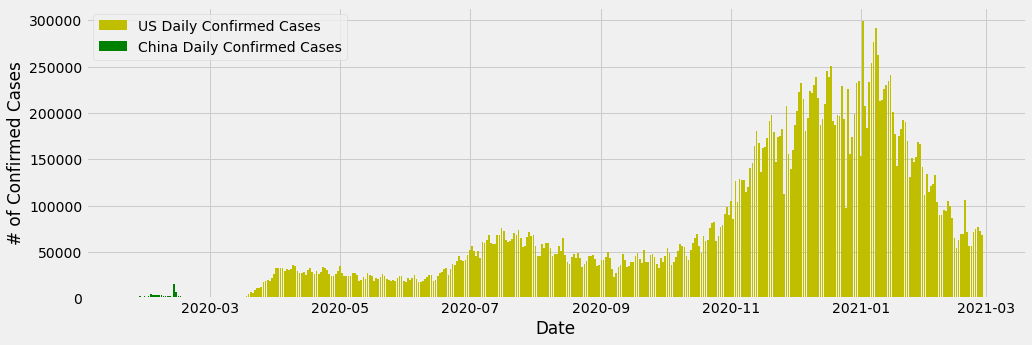

In [16]:
#Daily Confirmed Cases in the US and China

#us_df = us_df.reset_index()
#china_df = china_df.reset_index()
us_df['Daily Confirmed'] = us_df['Confirmed'].sub(us_df['Confirmed'].shift())
china_df['Daily Confirmed'] = china_df['Confirmed'].sub(china_df['Confirmed'].shift())

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Confirmed'], color = 'y', label = 'US Daily Confirmed Cases')
ax.bar(china_df['Date'], china_df['Daily Confirmed'], color = 'g', label = 'China Daily Confirmed Cases')
ax.set_xlabel('Date')
ax.set_ylabel('# of Confirmed Cases')
ax.title.set_text = ('The US v. China Daily Cases')

plt.legend(loc = 'upper left')
plt.show()


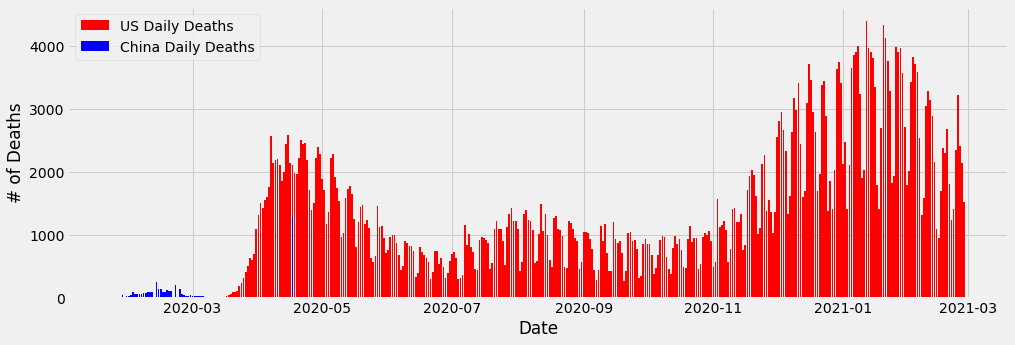

In [18]:
#Daily Deaths in the US and China

#china_df = china_df.reset_index()
#us_df= us_df.reset_index()
us_df['Daily Deaths'] = us_df['Deaths'].sub(us_df['Deaths'].shift())
china_df['Daily Deaths'] = china_df['Deaths'].sub(china_df['Deaths'].shift())

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(111)

ax.bar(us_df['Date'], us_df['Daily Deaths'], color = 'r', label = 'US Daily Deaths')
ax.bar(china_df['Date'], china_df['Daily Deaths'], color = 'b', label = 'China Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of Deaths')
ax.title.set_text = ('The US v. China Daily Deaths')

plt.legend(loc = 'upper left')
plt.show()